# TEXT-BASED ANALYSIS CS-651-A
# Vineeth Anumula
# Assignment-4

In [390]:
#!pip install praw

# Authentication

In [392]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="75KDE-IFRLibVrxXZmeRxA",
    client_secret="soTkYtacJWgMszOs35qSZfvXzzuWrg",
    user_agent=user_agent
)

In [393]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"technology"** subreddit channel will be use for this project

In [395]:
headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

The Chips Act has been surprisingly successful so far. The US has now spent over half its $39bn in incentives. In so doing it has driven an unexpected investment boom. Chip companies have announced investments of $327bn and a stunning 15-fold increase in construction of manufacturing facilities.
1cdad1g
taike0886
1714099307.0
4421
0.97
https://www.ft.com/content/26756186-99e5-448f-a451-f5e307b13723
0


### Get total comment in Subreddit

In [397]:
headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))


538


In [398]:
#Create a dataframe from the scrapped data 
technology_df = pd.DataFrame(headlines)
technology_df.head()

,0
0,"Nurses Protest ""Deeply Troubling"" Use of AI in..."
1,Reddit is updating its app to focus more on co...
2,Tech companies scale up MN lobbying efforts in...
3,FBI says Chinese hackers preparing to attack U...
4,TECH\nMeta loses $200 billion in value as Zuck...


In [399]:
df = technology_df.iloc[:, 1:]
technology_df.head()

,0
0,"Nurses Protest ""Deeply Troubling"" Use of AI in..."
1,Reddit is updating its app to focus more on co...
2,Tech companies scale up MN lobbying efforts in...
3,FBI says Chinese hackers preparing to attack U...
4,TECH\nMeta loses $200 billion in value as Zuck...


In [400]:
technology_df.columns

RangeIndex(start=0, stop=1, step=1)

In [401]:
technology_df.columns = ['Titles']

In [402]:
technology_df.head()

,Titles
0,"Nurses Protest ""Deeply Troubling"" Use of AI in..."
1,Reddit is updating its app to focus more on co...
2,Tech companies scale up MN lobbying efforts in...
3,FBI says Chinese hackers preparing to attack U...
4,TECH\nMeta loses $200 billion in value as Zuck...


In [403]:
technology_df.Titles.duplicated().sum() 

0

In [404]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
technology_df["Titles"]=technology_df["Titles"].apply(cleanTxt)

#Show the clean text
technology_df.head()

,Titles
0,"Nurses Protest ""Deeply Troubling"" Use of AI in..."
1,Reddit is updating its app to focus more on co...
2,Tech companies scale up MN lobbying efforts in...
3,FBI says Chinese hackers preparing to attack U...
4,TECH\nMeta loses $200 billion in value as Zuck...


In [405]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
technology_df["Titles"]= technology_df["Titles"].apply(remove_emoji)

#Show the clean text
technology_df.head()

,Titles
0,"Nurses Protest ""Deeply Troubling"" Use of AI in..."
1,Reddit is updating its app to focus more on co...
2,Tech companies scale up MN lobbying efforts in...
3,FBI says Chinese hackers preparing to attack U...
4,TECH\nMeta loses $200 billion in value as Zuck...


In [406]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [407]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
technology_df['Subjectivity'] = technology_df['Titles'].apply(getSubjectivity)
technology_df['Polarity'] = technology_df['Titles'].apply(getPolarity)

#Now display data
technology_df.head()

,Titles,Subjectivity,Polarity
0,"Nurses Protest ""Deeply Troubling"" Use of AI in...",0.4,0.0
1,Reddit is updating its app to focus more on co...,0.5,0.5
2,Tech companies scale up MN lobbying efforts in...,0.0,0.0
3,FBI says Chinese hackers preparing to attack U...,0.0,0.0
4,TECH\nMeta loses $200 billion in value as Zuck...,0.1,-0.3


In [408]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
technology_df["Insight"] = technology_df["Polarity"].apply(getInsight)

technology_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Nurses Protest ""Deeply Troubling"" Use of AI in...",0.400000,0.000000,Neutral
1,Reddit is updating its app to focus more on co...,0.500000,0.500000,Positive
2,Tech companies scale up MN lobbying efforts in...,0.000000,0.000000,Neutral
3,FBI says Chinese hackers preparing to attack U...,0.000000,0.000000,Neutral
4,TECH\nMeta loses $200 billion in value as Zuck...,0.100000,-0.300000,Negative
5,Microsoft's VASA-1 is a new AI model that turn...,0.454545,0.136364,Positive
6,Meta steps up AI battle with OpenAI and Google...,0.000000,0.000000,Neutral
7,Legislation that could force a TikTok ban revi...,0.125000,-0.125000,Negative
8,Google will spend more than $100 billion on AI...,0.500000,0.500000,Positive
9,Millions of Gamers Help Advance Microbiome Res...,0.300000,0.200000,Positive


# Data Visualization

In [410]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

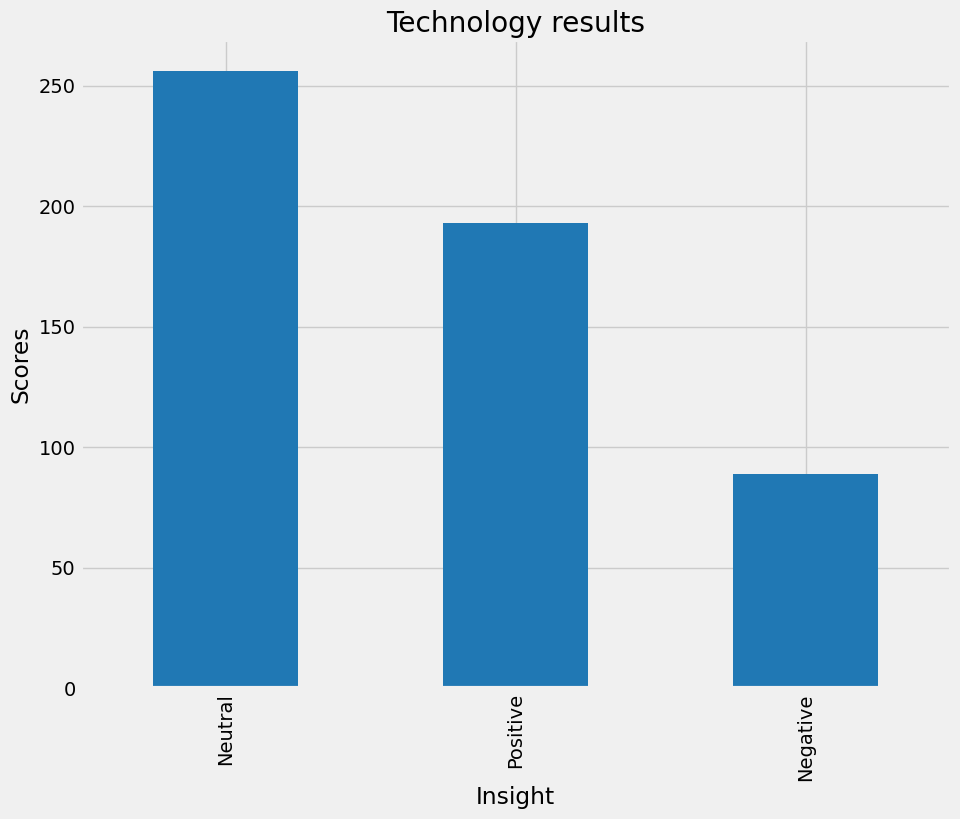

In [411]:
#Plot the values count of elections
plt.title("Technology results")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
technology_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

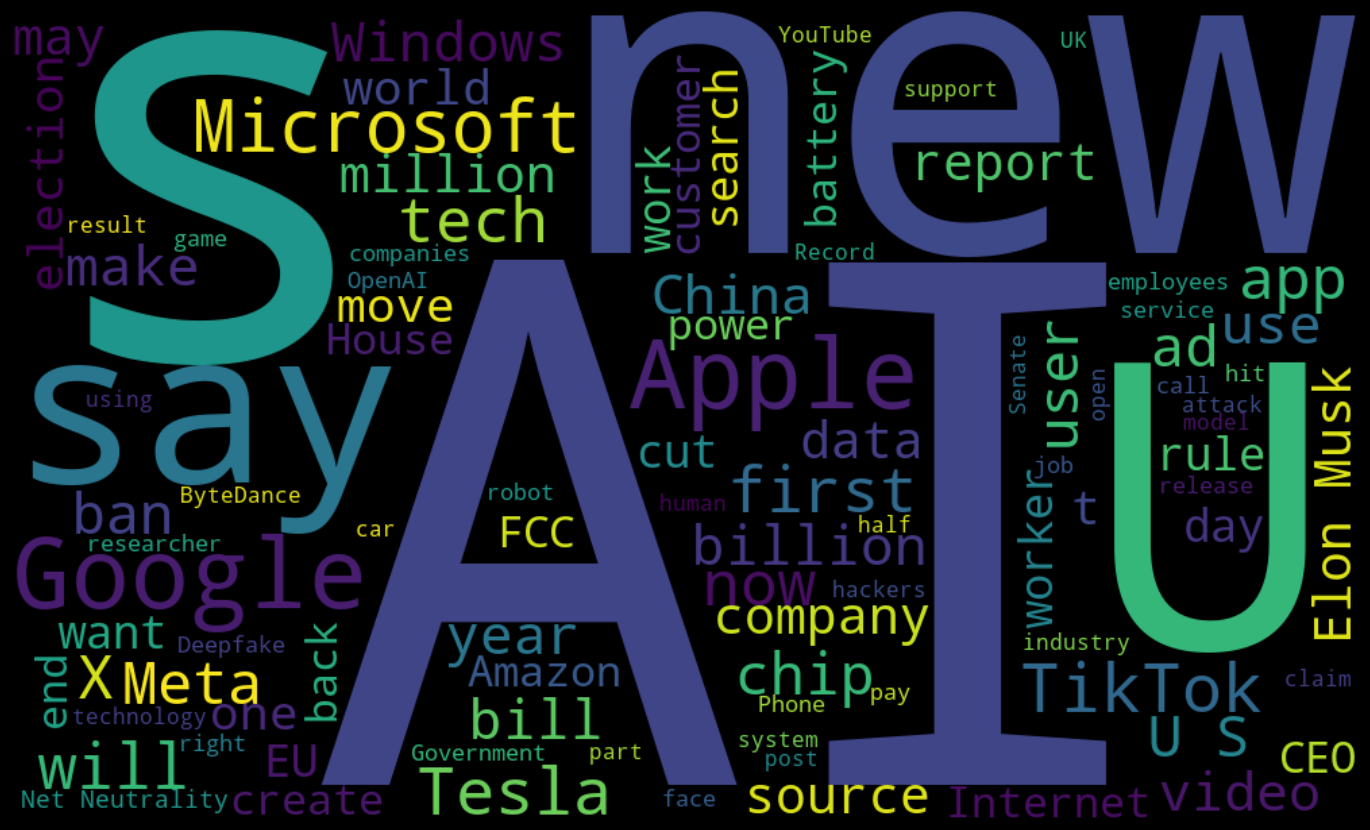

In [413]:
text = ' '.join( [twts for twts in technology_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

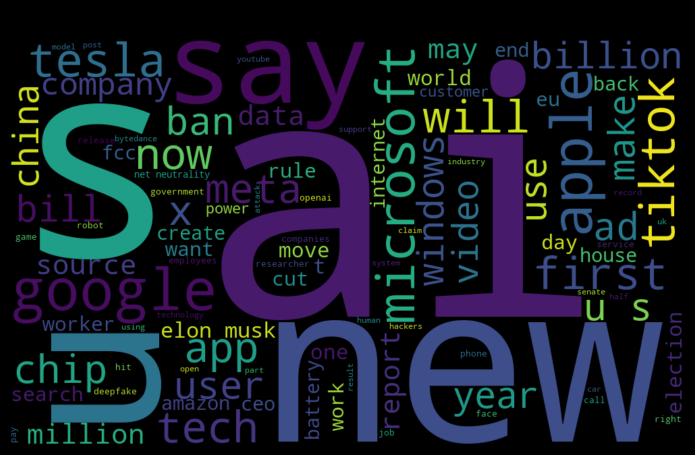

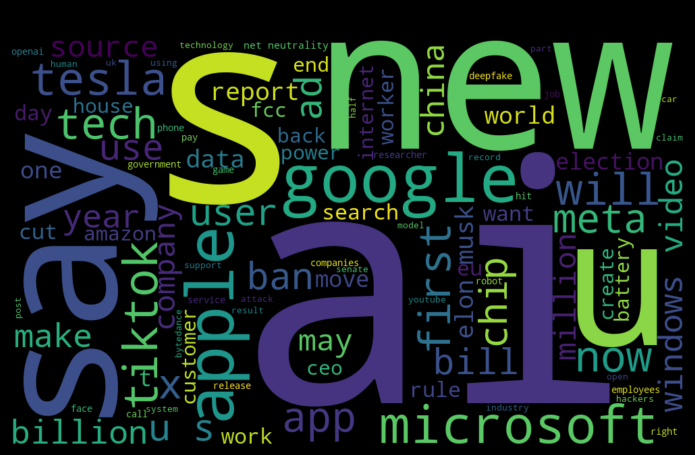

In [414]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_word_cloud(dataframe, company_name):
    # Join all texts from the dataframe
    text = ' '.join(twts.lower() for twts in dataframe['Titles'])  # Change 'Titles' if your column name is different

    # Generate word cloud
    wordcloud = WordCloud(
        width=1000,
        height=600,
        max_words=100,
        stopwords=STOPWORDS,
        background_color="black"
    ).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company_name}')
    plt.axis("off")
    plt.show()

# Assuming google_df and microsoft_df are your dataframes for Google and Microsoft respectively
generate_word_cloud(technology_df, "Google")
generate_word_cloud(technology_df, "Microsoft")
